# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "MIROC-ESM-CHEM"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/huss_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.251374244689941 to load the data
*********Start to merge*********
It takes elapsed_time 0.0768890380859375 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.11214542388916016 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.940748691558838 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6658728122711182 to mask the layer
*********Start to plot the layer*********


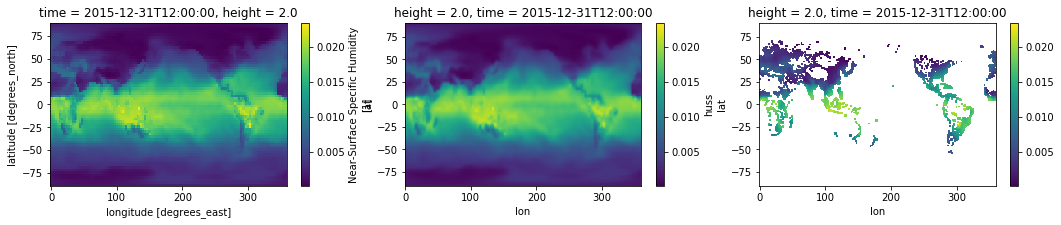

It takes elapsed_time 0.6717777252197266 to plot the layer
It takes elapsed_time 18.720051765441895 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/tas_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 6.608736038208008 to load the data
*********Start to merge*********
It takes elapsed_time 0.05063152313232422 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.03218507766723633 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.785832166671753 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6799473762512207 to mask the layer
*********Start to plot the layer*********


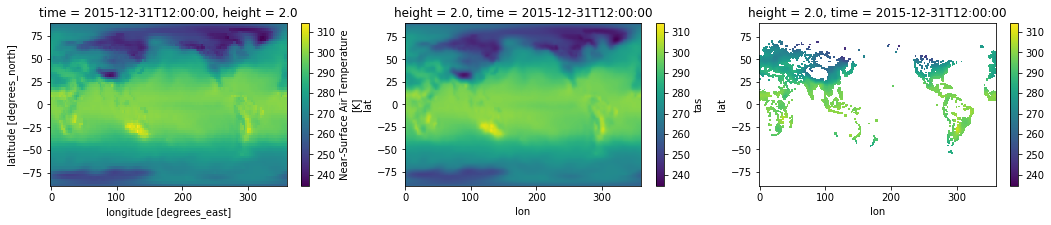

It takes elapsed_time 0.7169687747955322 to plot the layer
It takes elapsed_time 19.87560534477234 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/uas_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.867794990539551 to load the data
*********Start to merge*********
It takes elapsed_time 0.05001568794250488 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.03147315979003906 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.831488370895386 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6759002208709717 to mask the layer
*********Start to plot the layer*********


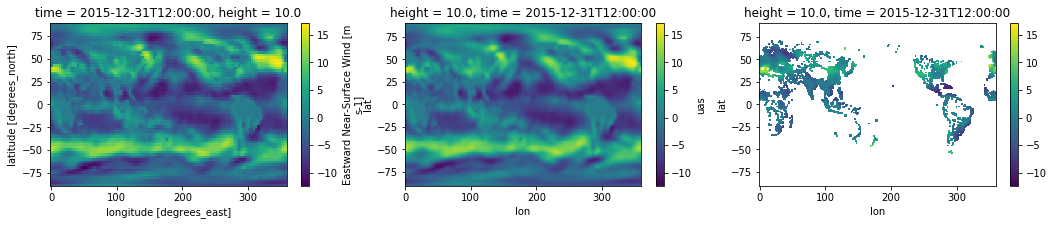

It takes elapsed_time 0.7066643238067627 to plot the layer
It takes elapsed_time 19.16430974006653 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/vas_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.916521787643433 to load the data
*********Start to merge*********
It takes elapsed_time 0.05049729347229004 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.031068801879882812 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.688961267471313 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6618294715881348 to mask the layer
*********Start to plot the layer*********


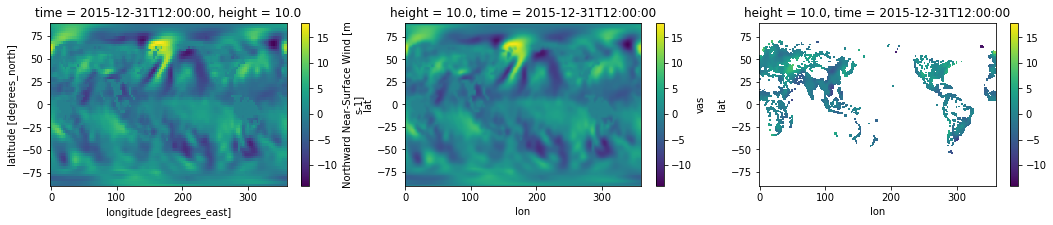

It takes elapsed_time 0.686089277267456 to plot the layer
It takes elapsed_time 19.03600311279297 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/pr_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.760327100753784 to load the data
*********Start to merge*********
It takes elapsed_time 0.04688858985900879 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.0314180850982666 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.719002962112427 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6607534885406494 to mask the layer
*********Start to plot the layer*********


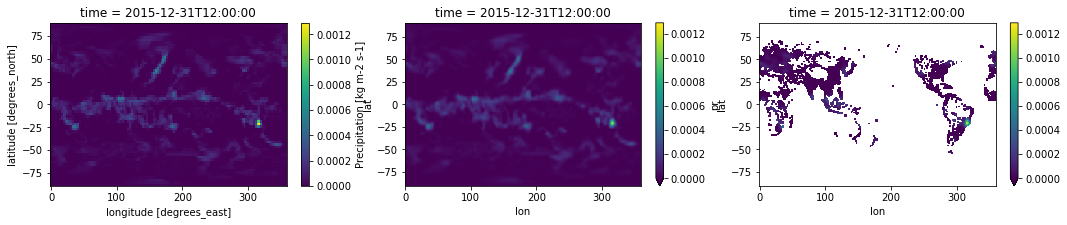

It takes elapsed_time 0.6621558666229248 to plot the layer
It takes elapsed_time 17.88215923309326 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/prsn_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.834200143814087 to load the data
*********Start to merge*********
It takes elapsed_time 0.06132817268371582 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.03145861625671387 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.647865772247314 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6692757606506348 to mask the layer
*********Start to plot the layer*********


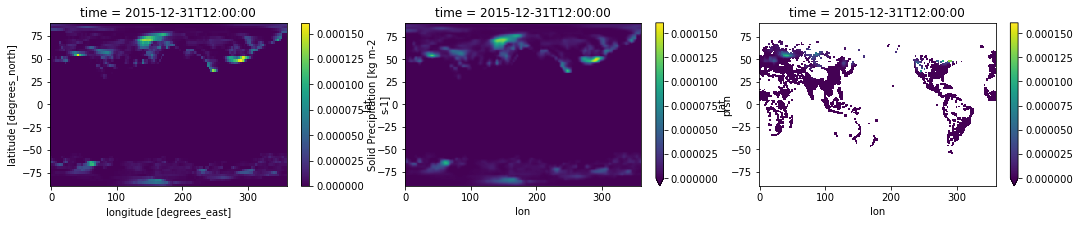

It takes elapsed_time 0.6593070030212402 to plot the layer
It takes elapsed_time 17.90485143661499 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/rlds_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 6.494984149932861 to load the data
*********Start to merge*********
It takes elapsed_time 0.04625821113586426 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.03025197982788086 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.683789491653442 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6533651351928711 to mask the layer
*********Start to plot the layer*********


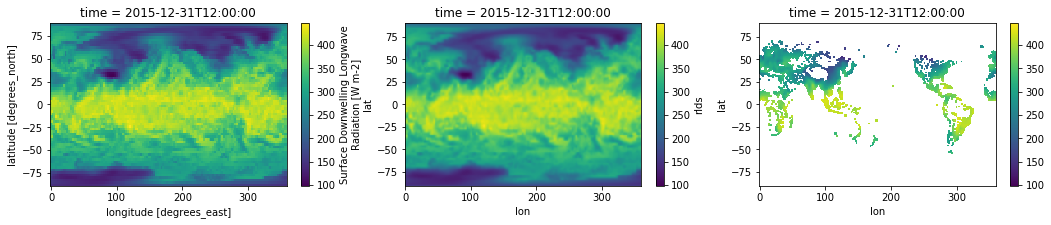

It takes elapsed_time 0.6811573505401611 to plot the layer
It takes elapsed_time 19.590843677520752 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/rlus_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.550236463546753 to load the data
*********Start to merge*********
It takes elapsed_time 0.04493546485900879 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.04997444152832031 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.579195499420166 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6578807830810547 to mask the layer
*********Start to plot the layer*********


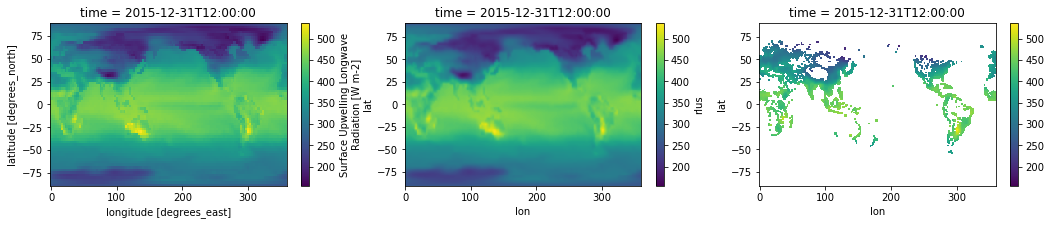

It takes elapsed_time 0.6780574321746826 to plot the layer
It takes elapsed_time 18.561607599258423 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/rsds_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.750256299972534 to load the data
*********Start to merge*********
It takes elapsed_time 0.045823097229003906 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.055287837982177734 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.643459558486938 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6664667129516602 to mask the layer
*********Start to plot the layer*********


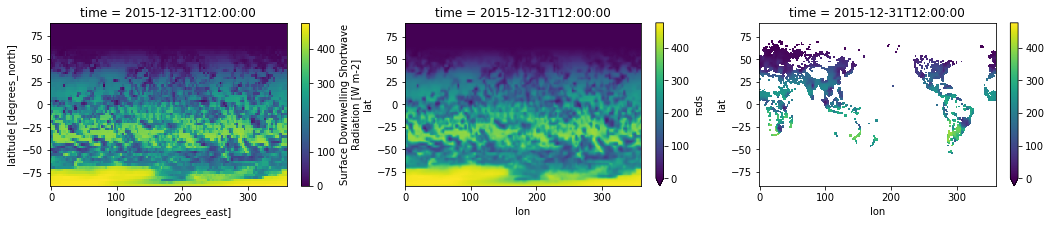

It takes elapsed_time 0.6607472896575928 to plot the layer
It takes elapsed_time 18.82303738594055 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/rsus_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.666037321090698 to load the data
*********Start to merge*********
It takes elapsed_time 0.03950238227844238 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.030141115188598633 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.620094537734985 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6760644912719727 to mask the layer
*********Start to plot the layer*********


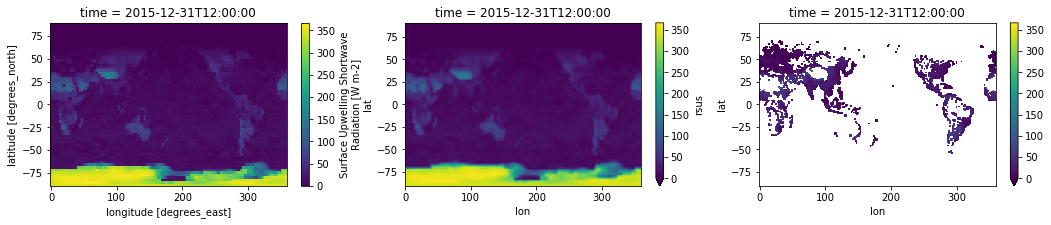

It takes elapsed_time 0.7203598022460938 to plot the layer
It takes elapsed_time 18.75366473197937 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2101, 95)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 32.376957654953 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

232.87738919258118


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/huss_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.038895845413208 to load the data
*********Start to merge*********
It takes elapsed_time 0.03412318229675293 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.06558084487915039 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.607851505279541 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6807222366333008 to mask the layer
*********Start to plot the layer*********


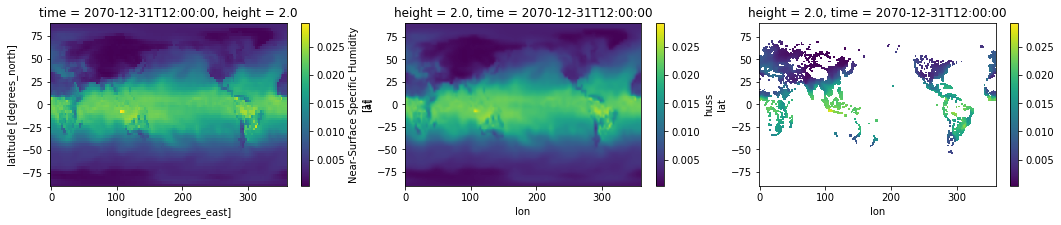

It takes elapsed_time 0.671903133392334 to plot the layer
It takes elapsed_time 17.100492000579834 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/tas_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.7715609073638916 to load the data
*********Start to merge*********
It takes elapsed_time 0.03846478462219238 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.030124425888061523 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.579814195632935 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.687504768371582 to mask the layer
*********Start to plot the layer*********


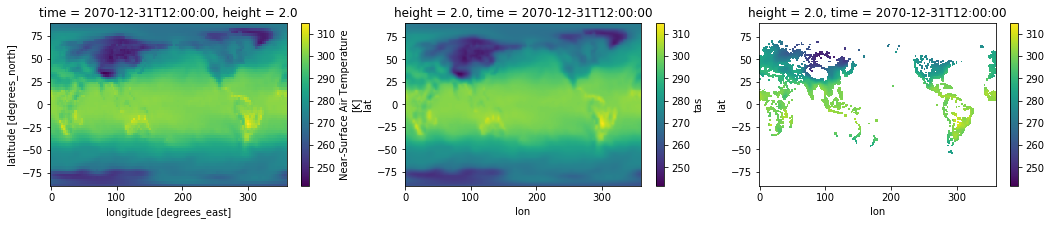

It takes elapsed_time 0.6884043216705322 to plot the layer
It takes elapsed_time 16.797136783599854 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/uas_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.50792932510376 to load the data
*********Start to merge*********
It takes elapsed_time 0.03974485397338867 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.030060291290283203 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.598039865493774 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6876504421234131 to mask the layer
*********Start to plot the layer*********


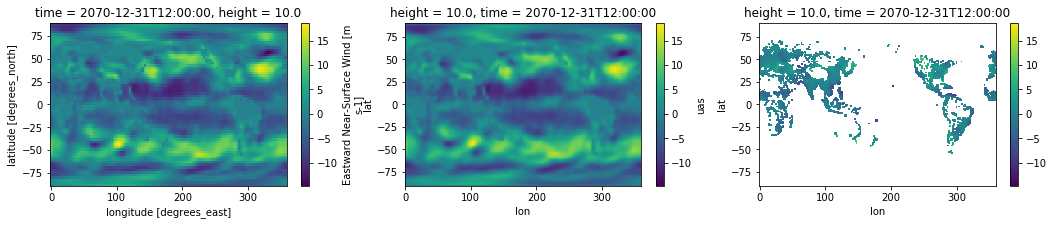

It takes elapsed_time 0.6886210441589355 to plot the layer
It takes elapsed_time 17.553151845932007 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/vas_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.103080987930298 to load the data
*********Start to merge*********
It takes elapsed_time 0.03894662857055664 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.030207157135009766 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.569862604141235 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6666133403778076 to mask the layer
*********Start to plot the layer*********


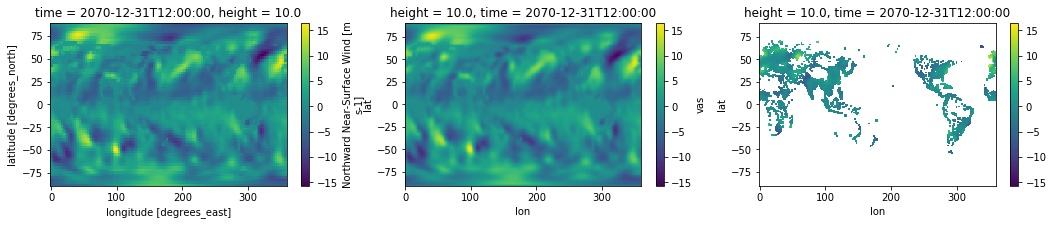

It takes elapsed_time 0.6771559715270996 to plot the layer
It takes elapsed_time 17.08662176132202 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/pr_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.388765335083008 to load the data
*********Start to merge*********
It takes elapsed_time 0.03993034362792969 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.03366589546203613 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.558458089828491 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6637051105499268 to mask the layer
*********Start to plot the layer*********


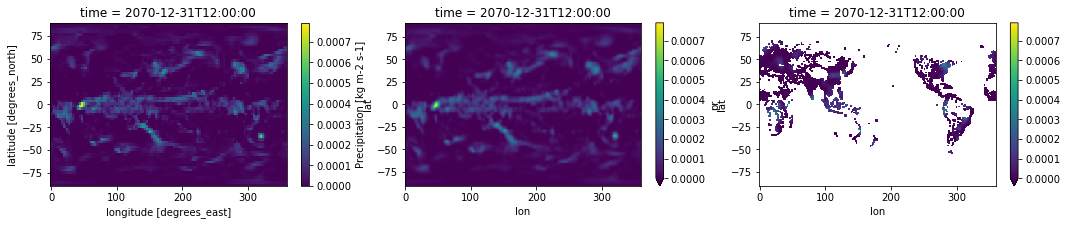

It takes elapsed_time 0.677375078201294 to plot the layer
It takes elapsed_time 17.362921237945557 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/prsn_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.705305814743042 to load the data
*********Start to merge*********
It takes elapsed_time 0.04391288757324219 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.030340194702148438 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.580233812332153 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6606354713439941 to mask the layer
*********Start to plot the layer*********


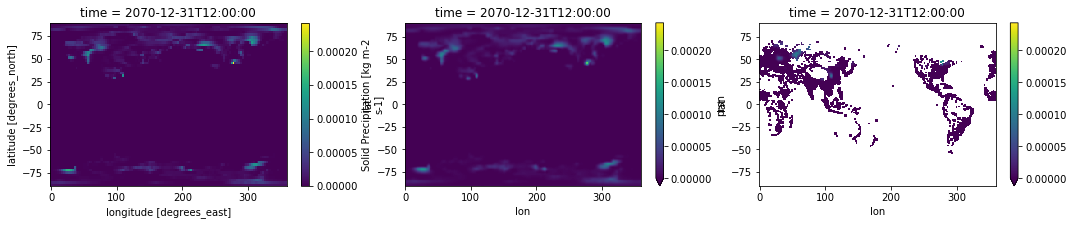

It takes elapsed_time 0.623201847076416 to plot the layer
It takes elapsed_time 16.64469838142395 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/rlds_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.4591217041015625 to load the data
*********Start to merge*********
It takes elapsed_time 0.03813648223876953 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.029613494873046875 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.584311962127686 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6627035140991211 to mask the layer
*********Start to plot the layer*********


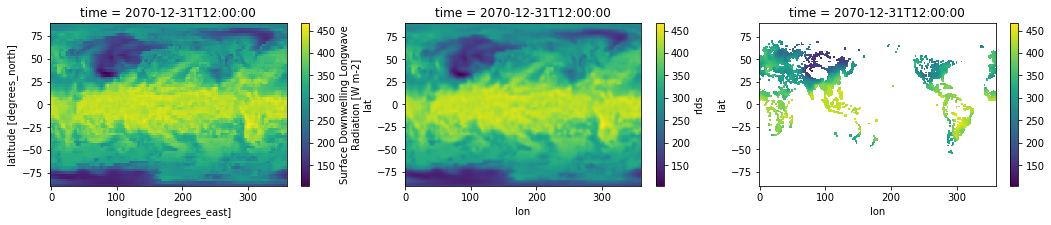

It takes elapsed_time 0.6729774475097656 to plot the layer
It takes elapsed_time 16.448137998580933 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/rlus_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 5.3141138553619385 to load the data
*********Start to merge*********
It takes elapsed_time 0.03731036186218262 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.029474258422851562 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.597432613372803 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6631591320037842 to mask the layer
*********Start to plot the layer*********


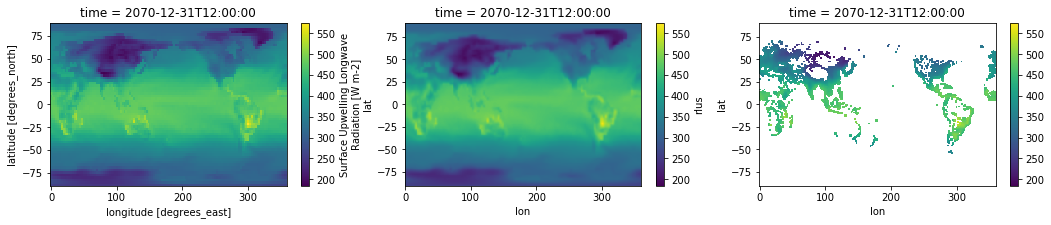

It takes elapsed_time 0.6733658313751221 to plot the layer
It takes elapsed_time 18.315908432006836 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/rsds_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 3.2698452472686768 to load the data
*********Start to merge*********
It takes elapsed_time 0.0374605655670166 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.09179043769836426 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.600736856460571 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.662553071975708 to mask the layer
*********Start to plot the layer*********


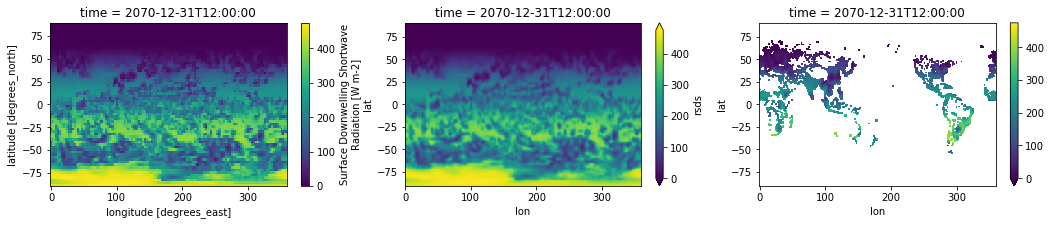

It takes elapsed_time 0.6512715816497803 to plot the layer
It takes elapsed_time 16.315130949020386 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/MIROC-ESM-CHEM/rsus_day_MIROC-ESM-CHEM_rcp85_r1i1p1_20060101-21001231.nc
It takes elapsed_time 4.6428444385528564 to load the data
*********Start to merge*********
It takes elapsed_time 0.037393808364868164 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_64x128_192x288_peri.nc
It takes elapsed_time 0.0909574031829834 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.877787828445435 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.66147780418396 to mask the layer
*********Start to plot the layer*********


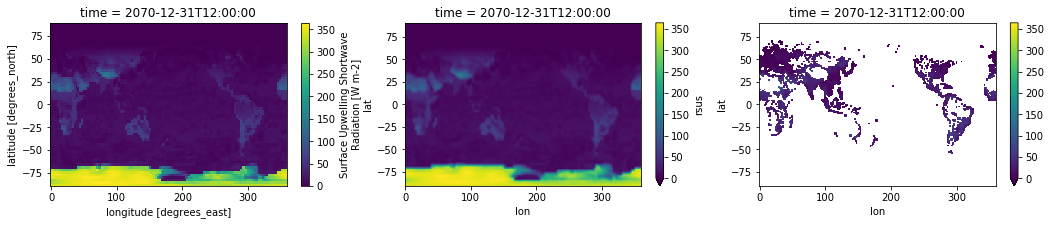

It takes elapsed_time 0.6634857654571533 to plot the layer
It takes elapsed_time 17.974672555923462 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2006, 2101, 95)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 28.980260133743286 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

227.8795223236084
